In [7]:
import xarray as xa


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature


def sample_data(shape=(20, 30)):
    """
    Returns ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned crs will be a rotated
    pole CRS, meaning that the vectors will be unevenly spaced in
    regular PlateCarree space.

    """
    crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

    x = np.linspace(311.9, 391.1, shape[1])
    y = np.linspace(-23.6, 24.8, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
    v = 20 * np.cos(6 * np.deg2rad(x2d))

    return x, y, u, v, crs

In [10]:
xdf = xa.open_dataset('/Users/bell/Downloads/for_Phyllis/uo_168_180_10_mon2014.nc')
xdf.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (i: 168, j: 180, k: 10, n: 12)
Dimensions without coordinates: i, j, k, n
Data variables:
    month    (n) int16 ...
    year     int16 ...
    lon      (j, i) float32 ...
    lat      (j, i) float32 ...
    ulon     (j, i) float32 ...
    ulat     (j, i) float32 ...
    z        (k) float32 ...
    dz       (k) float32 ...
    kmt      (j, i) int16 ...
    kmu      (j, i) int16 ...
    dxt      (j, i) float32 ...
    dyt      (j, i) float32 ...
    to       (n, k, j, i) float32 ...
    so       (n, k, j, i) float32 ...
    uo       (n, k, j, i) float32 ...
    vo       (n, k, j, i) float32 ...
Attributes:
    Description:  model/reanalysis output
    Model:        MIZMAS: Marginal Ice Zone Modeling and Assimilation System
    Reference:    Zhang, J., and D.A. Rothrock: Modeling global sea ice with ...
    History:      created 12/2018 by J. Zhang at APL/UW>

In [65]:
u = xdf.uo.values[1,1,:,:]
u[u>999]=np.nan

v = xdf.vo.values[1,1,:,:]
v[v>999]=np.nan

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


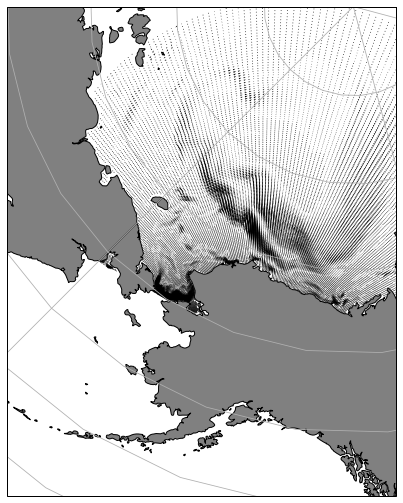

In [112]:
fig = plt.figure(1,figsize=(9,9))
ax = plt.axes(projection=ccrs.Orthographic(-135, 90))

coast = NaturalEarthFeature(category='physical', scale='50m',
                            facecolor='grey', name='land')

ax.set_global()
ax.gridlines()

ax.quiver(xdf.lon.values, xdf.lat.values, u, v, transform=ccrs.PlateCarree())
ax.set_extent([-180, -130, 55, 90], crs=ccrs.PlateCarree())
feature = ax.add_feature(coast, edgecolor='black')

fig.savefig('demo.png',dpi=300)